<a href="https://colab.research.google.com/github/RuslanMavlitov/IDE/blob/master/MATH%26ML_9_Boosting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import tree
from sklearn import model_selection
from sklearn import metrics
from sklearn import ensemble
from sklearn import linear_model

In [35]:
!pip install xgboost
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.8 MB 1.2 MB/s 


In [2]:
data = pd.read_csv('/content/sample_data/AirPass.zip')

Gender — пол пассажира (женский, мужской);

Customer Type — тип клиента (постоянный/непостоянный клиент);

Age — возраст клиента;

Type of Travel — цель перелета (личная/деловая поездка);

Class — туристический класс пассажира (Business, Eco, Eco Plus);

Flight distance — расстояние полета;

Inflight wifi service — уровень удовлетворённости Wi-Fi (0 — не 
применимо, 1–5);

Departure/Arrival time convenient — уровень удовлетворённости временем отправления и прибытия;

Ease of Online booking — уровень удовлетворённости онлайн-бронированием;

Gate location — уровень удовлетворённости расположением выхода на посадку;

Food and drink — уровень удовлетворённости едой и напитками;

Online boarding — уровень удовлетворённости онлайн-регистрацией;

Seat comfort — уровень удовлетворённости комфортом сидений;

Inflight entertainment — уровень удовлетворённости развлечениями на борту;

On-board service — уровень удовлетворённости сервисом на борту;

Leg room service — уровень удовлетворённости местом для ног;

Baggage handling — уровень удовлетворённости обработкой багажа;

Check-in service — уровень удовлетворённости услугами регистрации;

Inflight service — уровень удовлетворённости обслуживанием во время 
полёта;

Cleanliness — уровень удовлетворённости чистотой;

Departure Delay in Minutes — задержка при отправлении (в минутах);

Arrival Delay in Minutes — задержка при прибытии (в минутах);

Satisfaction — удовлетворённость авиакомпанией — целевая переменная (satisfaction/neutral/dissatisfaction).

In [3]:
data.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


Если при открытии данных первый столбец (порядковый номер строки) считался как отдельный признак, удалите его.

In [4]:
data = data.drop('Unnamed: 0', axis=1)

In [5]:
data.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [6]:
data.describe()

,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,64924.210502,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,37463.812252,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32533.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,64856.500000,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,97368.250000,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 103904 non-null  int64  
 1   Gender                             103904 non-null  object 
 2   Customer Type                      103904 non-null  object 
 3   Age                                103904 non-null  int64  
 4   Type of Travel                     103904 non-null  object 
 5   Class                              103904 non-null  object 
 6   Flight Distance                    103904 non-null  int64  
 7   Inflight wifi service              103904 non-null  int64  
 8   Departure/Arrival time convenient  103904 non-null  int64  
 9   Ease of Online booking             103904 non-null  int64  
 10  Gate location                      103904 non-null  int64  
 11  Food and drink                     1039

##Задание 6.1
Сколько всего в данных пропущенных значений?

In [ ]:
data.isnull().sum().sum()

310

##Задание 6.2
давайте избавимся от найденных пропусков. Заполните их все медианными значениями. После этого вычислите среднее арифметическое для признака, отражающего задержку при прибытии в минутах. Ответ округлите до двух знаков после точки-разделителя.

In [7]:
med = data['Arrival Delay in Minutes'].median()
data['Arrival Delay in Minutes'] = data['Arrival Delay in Minutes'].fillna(med)

In [8]:
data['Arrival Delay in Minutes'].mean()

15.133392362180475

##Задание 6.3
Проведём небольшой разведывательный анализ. Посмотрим, в каких категориях пассажиров превалировали удовлетворённые полетом клиенты.

Сравните удовлетворённость полётом мужчин и женщин.

In [ ]:
group_1 = data.groupby('Gender')['satisfaction'].value_counts()
group_1

Gender  satisfaction           
Female  neutral or dissatisfied    30193
        satisfied                  22534
Male    neutral or dissatisfied    28686
        satisfied                  22491
Name: satisfaction, dtype: int64

 сравним категории пассажиров в зависимости от их цели поездки.

In [ ]:
data.groupby('Type of Travel')['satisfaction'].value_counts()*100/data.shape[0]

Type of Travel   satisfaction           
Business travel  satisfied                  40.177472
                 neutral or dissatisfied    28.785225
Personal Travel  neutral or dissatisfied    27.881506
                 satisfied                   3.155798
Name: satisfaction, dtype: float64

 В каком туристическом классе наибольший процент довольных клиентов

In [ ]:
data.groupby('Class')['satisfaction'].value_counts()*100/data.shape[0]

Class     satisfaction           
Business  satisfied                  33.184478
          neutral or dissatisfied    14.614452
Eco       neutral or dissatisfied    36.614567
          satisfied                   8.374076
Eco Plus  neutral or dissatisfied     5.437712
          satisfied                   1.774715
Name: satisfaction, dtype: float64

Перекодируем часть бинарных признаков, чтобы использовать их при обучении:

In [9]:
data['satisfaction'] = data['satisfaction'].map({'neutral or dissatisfied':0 , 'satisfied':1})
data['Customer Type'] = data['Customer Type'].map({'Loyal Customer':1, 'disloyal Customer':0})
data['Type of Travel'] = data['Type of Travel'].map({'Personal Travel':0, 'Business travel':1})

##Задание 6.4
Для остальных категориальных признаков создайте dummy-переменные. Сделайте это с помощью функции get_dummies() из библиотеки Pandas, параметры не меняйте. Сколько теперь признаков в данных (включая целевую переменную)?

In [ ]:
data.columns.to_series().groupby(data.dtypes).groups

{int64: ['id', 'Customer Type', 'Age', 'Type of Travel', 'Flight Distance', 'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness', 'Departure Delay in Minutes', 'satisfaction'], float64: ['Arrival Delay in Minutes'], object: ['Gender', 'Class']}

In [10]:
cat_features = ['Gender', 'Class']

In [11]:
df = pd.get_dummies(data, columns=cat_features)
df.shape[1]

27

##Задание 6.5
Разбейте данные на обучающую и тестовую выборки в соотношении 80/20, параметр random_state = 26. Сколько наблюдений попало в тестовую выборку?

In [12]:
X = df.drop('satisfaction', axis = 1)
Y = df['satisfaction']  
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=0.2, random_state = 26)
Y_test.shape

(20781,)

##Задание 6.6
Теперь нам необходимо реализовать масштабирование данных. Для этого обучите на обучающей выборке метод StandardScaler() и с помощью него преобразуйте и обучающую, и тестовую выборки. Не забудьте, что целевую переменную обрабатывать не нужно.

In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train) 
X_train = scaler.transform(X_train) 
X_test = scaler.transform(X_test) 
X_test[0][0]

0.9408251379303

##Задание 6.7

В качестве первой модели возьмём самую простую — логистическую регрессию. Мы делаем это для того, чтобы потом сравнивать с ней полученные результаты: так вы сможете выяснить, насколько ансамбли смогут улучшить точность прогноза.

Обучите логистическую регрессию с параметрами по умолчанию на наших данных. В качестве ответа введите значение метрики f1_score. Ответ округлите до трёх знаков после точки-разделителя.

In [17]:
lr = linear_model.LogisticRegression()
lr.fit(X_train, Y_train)
y_pred_lr = lr.predict(X_test)
f1_lr = metrics.f1_score(Y_test, y_pred_lr)
print(f'f1_score  логистической регрессии равен {f1_lr:.3f}')

f1_score  логистической регрессии равен 0.855


##Задание 6.8

перейдём к бустингу. Начнём с обучения первой модели — AdaBoost. В качестве базовой модели для неё возьмите решающее дерево с параметром random_state = 26.

Обучите AdaBoost, зафиксировав random_state со значением 26 и задав темп обучения 0.01. В качестве ответа введите значение метрики f1_score. Ответ округлите до трёх знаков после точки-разделителя

In [20]:
adaboost = ensemble.AdaBoostClassifier(
    base_estimator=tree.DecisionTreeClassifier(random_state=26),
    random_state=26,
    learning_rate=0.01
)
adaboost.fit(X_train, Y_train)
y_pred_adaboost = adaboost.predict(X_test)
f1_adaboost = metrics.f1_score(Y_test, y_pred_adaboost)
print(f'f1_score модели AdaBoost равен {f1_adaboost:.3f}')

f1_score модели AdaBoost равен 0.940


##Задание 6.9

Перейдем к следующему алгоритму — градиентному бустингу.

Будем настраивать количество деревьев и темп обучения, делая перебор по следующей сетке:

params = {"n_estimators":2^^np.arange(8), "learning_rate":0.1^^np.arange(3)}

Используйте для поиска оптимальных параметров GridSearchCV, а для ускорения работы алгоритма задайте параметр кросс-валидации, равный 3.


In [30]:
params = {"n_estimators":2**np.arange(8), "learning_rate":0.1**np.arange(3)}
grid_search_cv = model_selection.GridSearchCV(
    ensemble.GradientBoostingClassifier(),
    params,
    cv=3,
    verbose=5
)
grid_search_cv.fit(X_train, Y_train)
print("Лучшие гиперпараметры:", grid_search_cv.best_params_)
print("Лучшее значение метрики:", grid_search_cv.best_score_)

Fitting 3 folds for each of 24 candidates, totalling 72 fits
[CV 1/3] END .learning_rate=1.0, n_estimators=1;, score=0.886 total time=   0.2s
[CV 2/3] END .learning_rate=1.0, n_estimators=1;, score=0.883 total time=   0.2s
[CV 3/3] END .learning_rate=1.0, n_estimators=1;, score=0.885 total time=   0.2s
[CV 1/3] END .learning_rate=1.0, n_estimators=2;, score=0.901 total time=   0.3s
[CV 2/3] END .learning_rate=1.0, n_estimators=2;, score=0.899 total time=   0.3s
[CV 3/3] END .learning_rate=1.0, n_estimators=2;, score=0.897 total time=   0.3s
[CV 1/3] END .learning_rate=1.0, n_estimators=4;, score=0.916 total time=   0.6s
[CV 2/3] END .learning_rate=1.0, n_estimators=4;, score=0.911 total time=   0.6s
[CV 3/3] END .learning_rate=1.0, n_estimators=4;, score=0.912 total time=   0.6s
[CV 1/3] END .learning_rate=1.0, n_estimators=8;, score=0.932 total time=   1.1s
[CV 2/3] END .learning_rate=1.0, n_estimators=8;, score=0.932 total time=   1.1s
[CV 3/3] END .learning_rate=1.0, n_estimators=8;


Какое наибольшее значение метрики f1_score получилось? Ответ округлите до трёх знаков после точки-разделителя.

In [32]:
gbc = ensemble.GradientBoostingClassifier(
    n_estimators=128,
    learning_rate=1.0
)
gbc.fit(X_train, Y_train)
y_pred_gbc = gbc.predict(X_test)
f1_gbc = metrics.f1_score(Y_test, y_pred_gbc)
print(f'f1_score модели GradientBoostingClassifier равен {f1_gbc:.3f}')

f1_score модели GradientBoostingClassifier равен 0.951


2. Какие значения гиперпараметров были выбраны как оптимальные?

In [31]:
grid_search_cv.best_params_

{'learning_rate': 1.0, 'n_estimators': 128}

##Задание 6.10

Обучите алгоритм XGBoost. Так как он достаточно мощный «из коробки», определите его с параметрами по умолчанию. Задайте только random_state = 26. Какое значение метрики f1_score получилось? Ответ округлите до трёх знаков после точки-разделителя.

In [38]:
from xgboost import XGBClassifier

xgb = XGBClassifier(random_state=26)
xgb.fit(X_train, Y_train)
y_preds_xgb = xgb.predict(X_test)
f1_xgb = metrics.f1_score(y_preds_xgb, Y_test)

print(f'f1_score модели XGBoost равен {f1_xgb:.3f}')

f1_score модели XGBoost равен 0.934


##Задание 6.11

Обучите алгоритм CatBoost. Как и XGBoost, будем обучать его с настройками по умолчанию. Какое значение метрики f1_score получилось? Ответ округлите до трёх знаков после точки-разделителя.

In [47]:
from catboost import Pool, CatBoostClassifier
train_dataset = Pool(data=X_train,label=Y_train)

cbc = CatBoostClassifier()
cbc.fit(train_dataset)
y_pred_cbc = cbc.predict(X_test)
f1_cbc = metrics.f1_score(y_pred_cbc, Y_test)

print(f'f1_score модели catboost равен {f1_cbc:.3f}')

Learning rate set to 0.068023
0:	learn: 0.6018110	total: 22.9ms	remaining: 22.9s
1:	learn: 0.5020759	total: 46ms	remaining: 23s
2:	learn: 0.4472650	total: 69.5ms	remaining: 23.1s
3:	learn: 0.4096145	total: 92.3ms	remaining: 23s
4:	learn: 0.3625843	total: 115ms	remaining: 22.9s
5:	learn: 0.3353496	total: 140ms	remaining: 23.2s
6:	learn: 0.3077159	total: 164ms	remaining: 23.2s
7:	learn: 0.2921057	total: 187ms	remaining: 23.2s
8:	learn: 0.2790137	total: 218ms	remaining: 24s
9:	learn: 0.2644637	total: 242ms	remaining: 24s
10:	learn: 0.2486156	total: 271ms	remaining: 24.4s
11:	learn: 0.2333939	total: 294ms	remaining: 24.2s
12:	learn: 0.2255879	total: 316ms	remaining: 24s
13:	learn: 0.2155879	total: 338ms	remaining: 23.8s
14:	learn: 0.2061555	total: 361ms	remaining: 23.7s
15:	learn: 0.2008756	total: 393ms	remaining: 24.2s
16:	learn: 0.1953169	total: 416ms	remaining: 24.1s
17:	learn: 0.1889286	total: 445ms	remaining: 24.3s
18:	learn: 0.1829706	total: 469ms	remaining: 24.2s
19:	learn: 0.179001

##Задание 6.12

Выведите матрицу ошибок для алгоритма, который получил наилучшие показатели качества модели на обучающей выборке (будем считать, что оцениваем по f1_score). Заполните соответствующие значения

In [48]:
from catboost.utils import get_confusion_matrix

get_confusion_matrix(cbc, Pool(X_train, Y_train))

array([[46665.,   541.],
       [ 1289., 34628.]])

##Задание 6.13
Оцените важность признаков для модели из предыдущего задания. Отметьте три признака, которые оказывают наибольшее влияние на значение целевой переменной

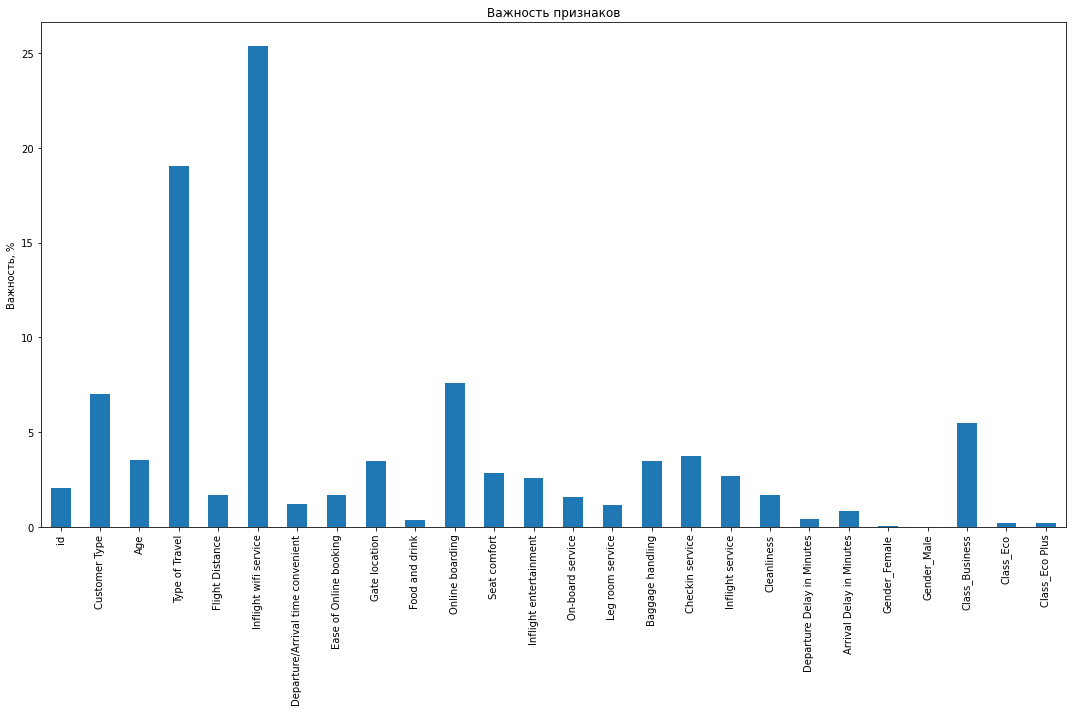

In [52]:
cat_boost_imp = pd.Series(cbc.get_feature_importance(), df.drop('satisfaction', axis = 1).columns)
fig, ax = plt.subplots(figsize=(15,10))
cat_boost_imp.plot.bar(ax=ax)
ax.set_title("Важность признаков")
ax.set_ylabel('Важность, %')
fig.tight_layout()